In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')

In [2]:
# matplotlib image size and resolution
mpl_options = {"figsize":(18,8), "dpi":100}
sns.set(rc={'figure.figsize':(18,8)})
sns.set_style('white')

## sns.lmplot 
sns.lmplot is very useful for looking for relationships and correlations 

Some of the import arguments:

1. hue = df.col() where is column is categorical, this helps a lot when trying to determine correlations based on "type"

2. markers = [] sets markers for types in "HUE"

3. we can also initroduce rows and cols to make a matrix of intercections 

4. x_jitter makes a slightly more visible x's on the graph

5. x_estimator provides an estimator instead of multiple points (visually better)

6. x_ci (for x_estimator) and ci are providing the 1-$\alpha$ CI for x and regression  

7. if we have unbinned data we can bin them using bins = n

8. order = 2 creates a polynom of second degree 

9. robust = True cuts out the outliers from the regression plot [2%, 98%]

10. logistic = True 

11. lowess = True non-parametric  LR

12. logx = True 

13. truncate = True cuts regressions on the start and fininsh of the data 

In [41]:
sns.lmplot?

Signature:
sns.lmplot(
    *,
    x=None,
    y=None,
    data=None,
    hue=None,
    col=None,
    row=None,
    palette=None,
    col_wrap=None,
    height=5,
    aspect=1,
    markers='o',
    sharex=True,
    sharey=True,
    hue_order=None,
    col_order=None,
    row_order=None,
    legend=True,
    legend_out=True,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    x_jitter=None,
    y_jitter=None,
    scatter_kws=None,
    line_kws=None,
    size=None,
)
Docstring:
Plot data and regression model fits across a FacetGrid.

This function combines :func:`regplot` and :class:`FacetGrid`. It is
intended as a convenient interface to fit regression models across
conditional subsets of a dataset.

When thinking about how to assign variables to 

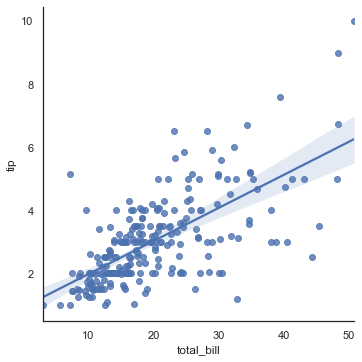

In [4]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip')

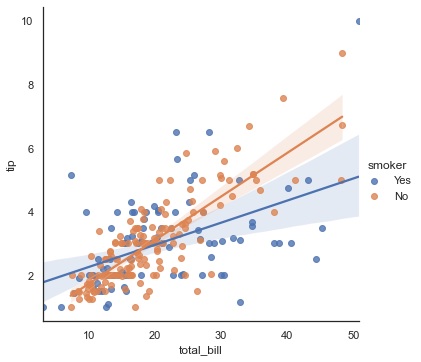

In [5]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker')

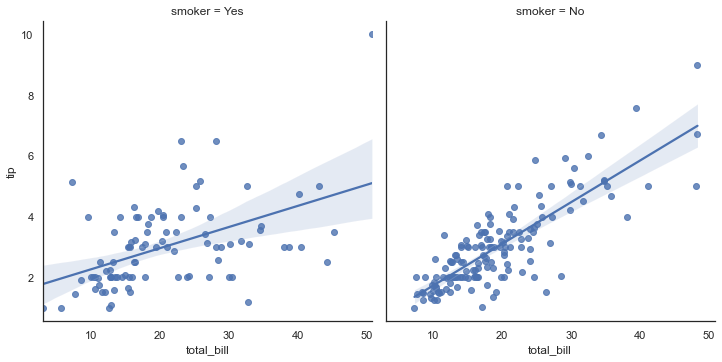

In [6]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'smoker')

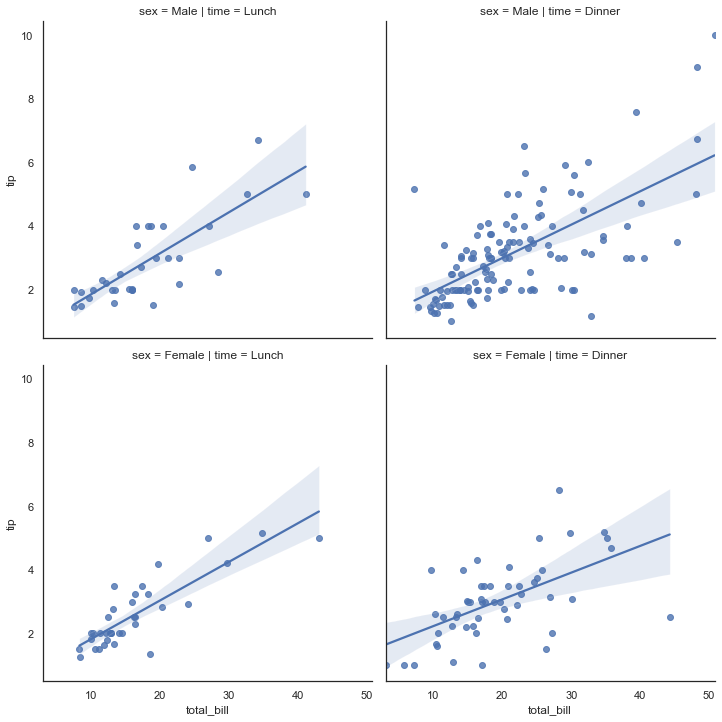

In [7]:
g = sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips)

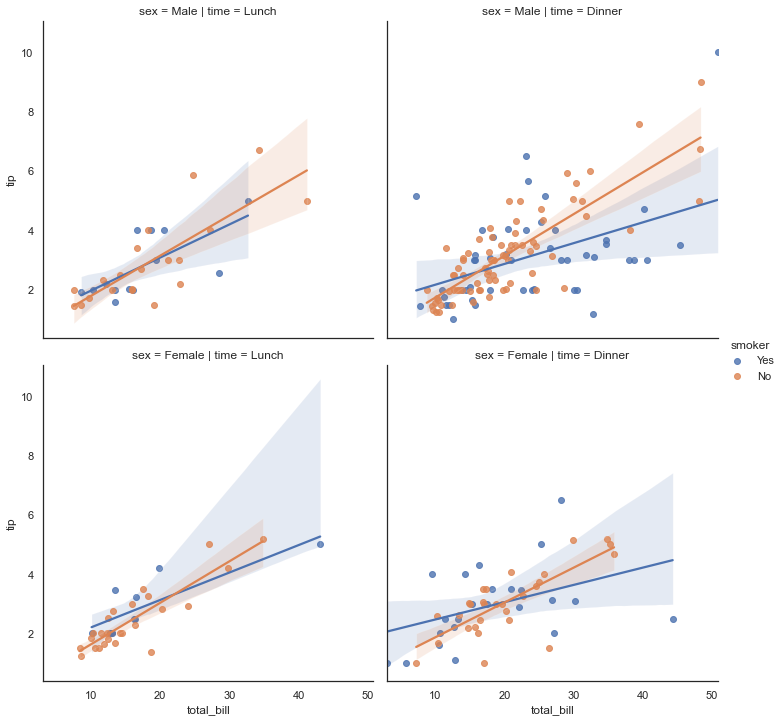

In [35]:
g = sns.lmplot(x="total_bill", y="tip", row="sex", col="time", hue = 'smoker', data=tips)

In [27]:
tips

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


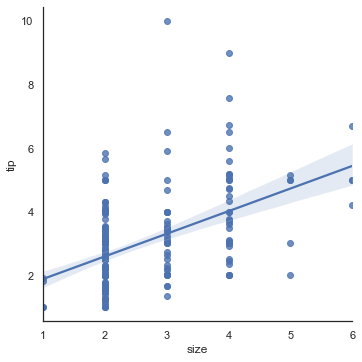

In [9]:
sns.lmplot(x="size", y="tip", data=tips);

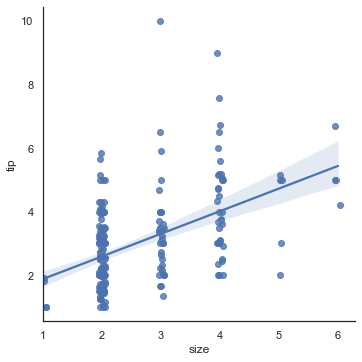

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

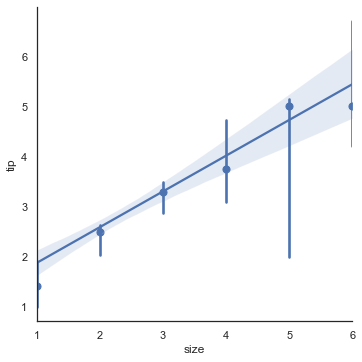

In [31]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.median);

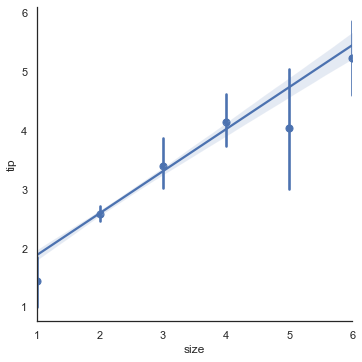

In [40]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean, x_ci=90, ci=50);

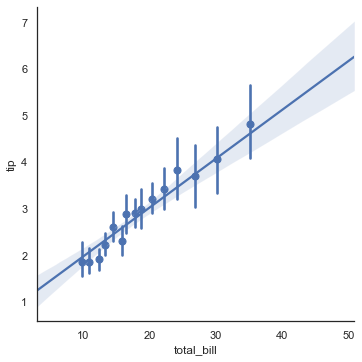

In [33]:
g = sns.lmplot(x="total_bill", y="tip", data=tips, x_bins=15)

In [14]:
anscombe = sns.load_dataset("anscombe")

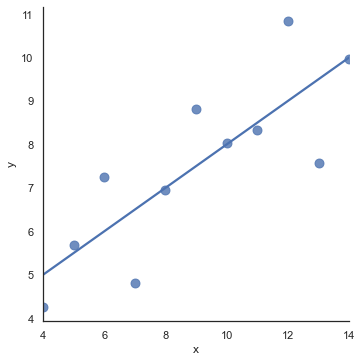

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

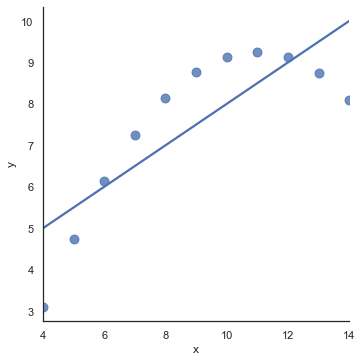

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

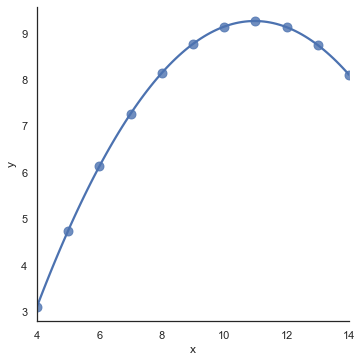

In [17]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

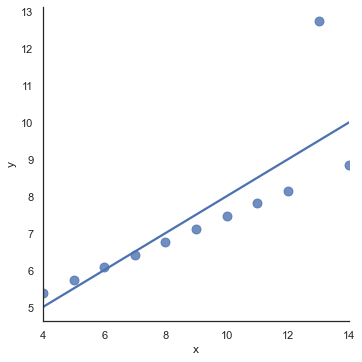

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

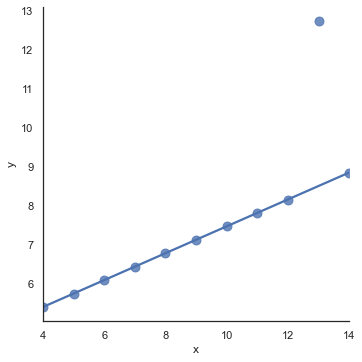

In [19]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

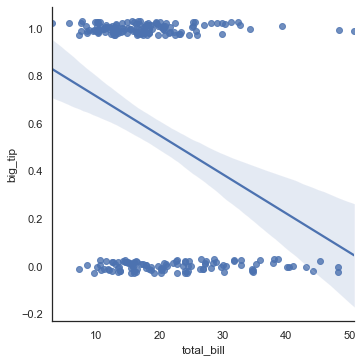

In [20]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

In [ ]:
order = 2 creates a polynom of second degree 

robust = True cuts out the outliers from the regression plot 

logistic = True 

lowess = True 

logx = True 

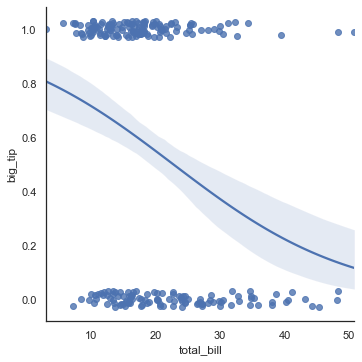

In [21]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

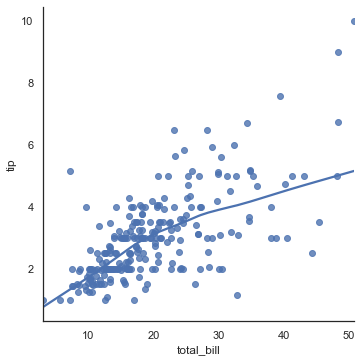

In [22]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

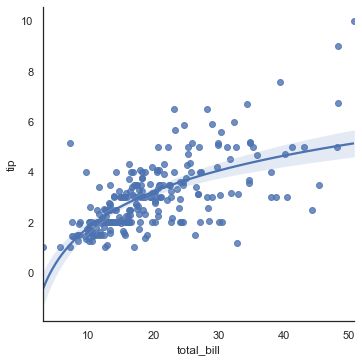

In [23]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           logx=True);

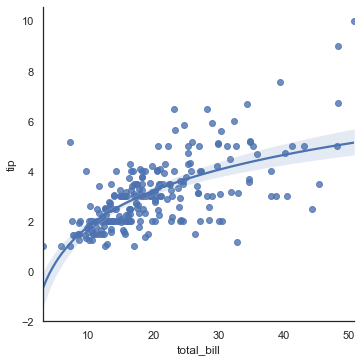

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           logx=True, truncate=True);

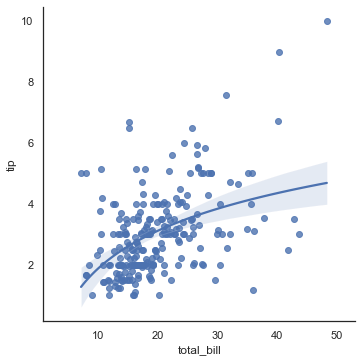

In [25]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           logx=True, truncate=True, x_partial="size");

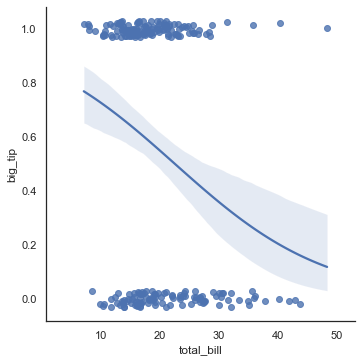

In [26]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03, x_partial="size");